# Sentiment2Emoji

Quick notebook to create the ml models and serialize them for the web app. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
import numpy as np

%matplotlib inline

## Data Prep

In [13]:
# Anger
df = pd.read_csv('./data/StackOverflowCSV/anger.csv', delimiter=';')
anger = df.loc[df['label'] == 'YES']
anger['label'] = 'anger'  # change label
del anger['id']  # drop column

# Fear
df = pd.read_csv('./data/StackOverflowCSV/fear.csv', delimiter=';')
fear = df.loc[df['label'] == 'YES']
fear['label'] = 'fear'  # change label
del fear['id']  # drop column

# Joy
df = pd.read_csv('./data/StackOverflowCSV/joy.csv', delimiter=';')
joy = df.loc[df['label'] == 'YES']
joy['label'] = 'joy'  # change label
del joy['id']  # drop column

# Love
df = pd.read_csv('./data/StackOverflowCSV/love.csv', delimiter=';')
love = df.loc[df['label'] == 'YES']
love['label'] = 'love'  # change label
del love['id']  # drop column

# Sad
df = pd.read_csv('./data/StackOverflowCSV/sadness.csv', delimiter=';')
sad = df.loc[df['label'] == 'YES']
sad['label'] = 'sad'  # change label
del sad['id']  # drop column

# Surprise
df = pd.read_csv('./data/StackOverflowCSV/surprise.csv', delimiter=';')
surprised = df.loc[df['label'] == 'YES']
surprised['label'] = 'surprised'  # change label
del surprised['id']  # drop column

/Users/brandon/anaconda/envs/sentiment2emoji/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/brandon/anaconda/envs/sentiment2emoji/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/brandon/anaconda/envs/sentiment2emoji/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

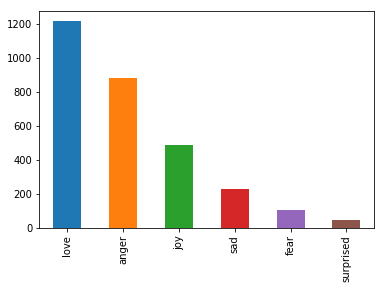

In [14]:
all = [anger, fear, joy, sad, love, surprised]

df = pd.concat(all)
df['label'].value_counts().plot(kind='bar')

## Model

In [15]:
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(df['text'])

In [16]:
scores = cross_val_score(RandomForestClassifier(n_estimators=100), x_train, df['label'], cv=5)
print('Random Forest classifer Mean CV accuracy: {:.2f}'.format(np.mean(scores)))

scores = cross_val_score(GradientBoostingClassifier(), x_train, df['label'], cv=5)
print('Gradient boosting classifer Mean CV accuracy: {:.2f}'.format(np.mean(scores)))

scores = cross_val_score(MultinomialNB(), x_train, df['label'], cv=5)
print('Naive Bayes classifer Mean CV accuracy: {:.2f}'.format(np.mean(scores)))

Random Forest classifer Mean CV accuracy: 0.68
Gradient boosting classifer Mean CV accuracy: 0.73
Naive Bayes classifer Mean CV accuracy: 0.60


In [17]:
clf = GradientBoostingClassifier().fit(x_train, df['label'])

In [18]:
test = vectorizer.transform(['I hated that movie!'])
clf.predict(test)

array(['anger'], dtype=object)

### Save for later

In [ ]:
import pickle
pickle.dump(clf, open('gb_model.sklearn', 'wb'))
pickle.dump(vectorizer, open('tfidf.sklearn', 'wb'))

In [ ]:
joblib.dump(vectorizer, 'tfidf.sklearn')

In [ ]:
df['label'].value_counts()